# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

##**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

###1. Cross tabulate treatment and breast_cancer_death. What is the difference in 25-year survival rates between the control and mammogram groups?

In [4]:
df = pd.read_csv('/content/mammogram.csv')
cross_tab = pd.crosstab(df['treatment'], df['breast_cancer_death'])
print(cross_tab)

breast_cancer_death     no  yes
treatment                      
control              44405  505
mammogram            44425  500


The difference is relatively small. The amount of breast cancer deaths is lower by 5 in the mammogram group, while the amount of women who did not die is higher by 20.

###2. Bootstrap the densities and distributions of survival rates for the two groups.

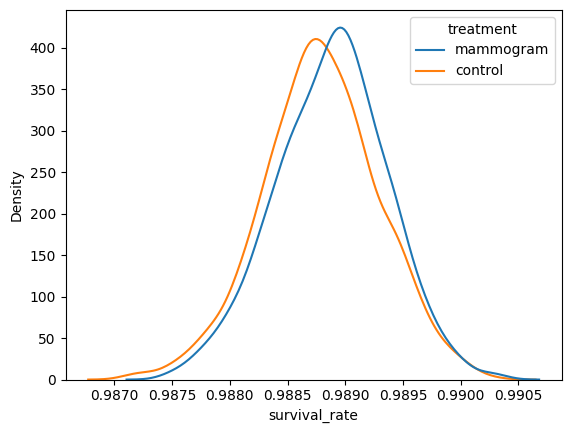

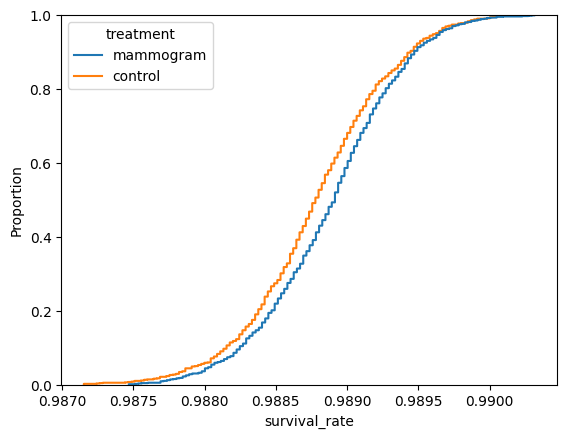

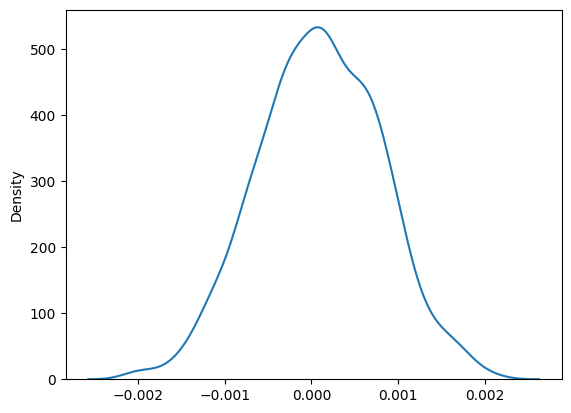

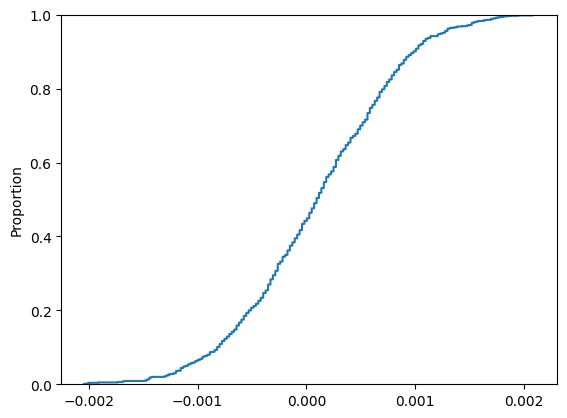

In [5]:
df['survive'] = 0
df.loc[ df['breast_cancer_death'] == 'no', 'survive'] = 1

df_mammogram = df.loc[df['treatment'] == 'mammogram', :]
df_control = df.loc[df['treatment'] == 'control', :]

N_mammogram = df_mammogram.shape[0]
N_control = df_control.shape[0]

S = 1000
rate_mammogram = np.zeros(S)
rate_control = np.zeros(S)
diff = np.zeros(S)

for s in range(S):
  sample_mammogram = df_mammogram.sample(N_mammogram,axis=0,replace=True)
  rate_mammogram[s] = np.mean(sample_mammogram['survive'])
  sample_control = df_control.sample(N_control,axis=0,replace=True)
  rate_control[s] = np.mean(sample_control['survive'])
  diff[s] = rate_mammogram[s] - rate_control[s]

rdf_mammogram = pd.DataFrame({'treatment':'mammogram', 'survival_rate':rate_mammogram})
rdf_control = pd.DataFrame({'treatment':'control', 'survival_rate':rate_control})
rdf = pd.concat([rdf_mammogram, rdf_control],axis=0)

sns.kdeplot(data=rdf, x='survival_rate', hue='treatment')
plt.show()

sns.ecdfplot(data=rdf, x='survival_rate', hue='treatment')
plt.show()

sns.kdeplot(diff)
plt.show()

sns.ecdfplot(diff)
plt.show()

###3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?

In [6]:
CI = np.quantile(diff, [0.005, 0.995])
print(CI)

[-0.0017337   0.00180718]


This confidence interval does include zero, meaning that we cannot reject the hypothesis that the populations have the same value. This means that it is very unlikely that getting a mammogram has a statistically significant difference in survival rate.

###4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

There are limitations and potential biases in this data. It may not represent the whole population of women who have had breast cancer and who have received mammograms. Thus, it is not smart to conclude whether or not mammograms are effective off of this data set alone. I would want more information on the demographics of the group, such as age, health history, etc. It would also be useful to have the stages of cancer each patient was in. This data would help address possible limitations to more fully understand the results.

##**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

###1. Cross tabulate treatment and outcome.

In [13]:
df = pd.read_csv('/content/diabetes_hw.csv')
cross_tab = pd.crosstab(df['treatment'], df['outcome'])
print(cross_tab)

outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143


###2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?

In [14]:
lifestyle_success = 125/(125+109)
met_success = 112/(112+120)
rosi_success = 143/(143+90)

print("lifestyle success proportion: " + str(lifestyle_success))
print("met success proportion: " + str(met_success))
print("rosi success proportion: " + str(rosi_success))

lifestyle success proportion: 0.5341880341880342
met success proportion: 0.4827586206896552
rosi success proportion: 0.6137339055793991


It appears that the drug rosiglitazone is the most effective since the variable 'rosi' has the highest succes rate.

###3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?

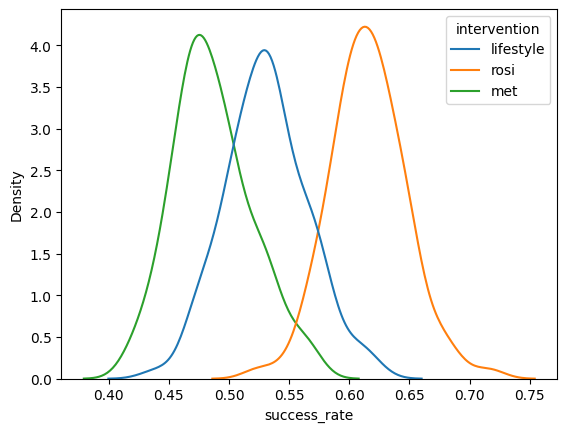

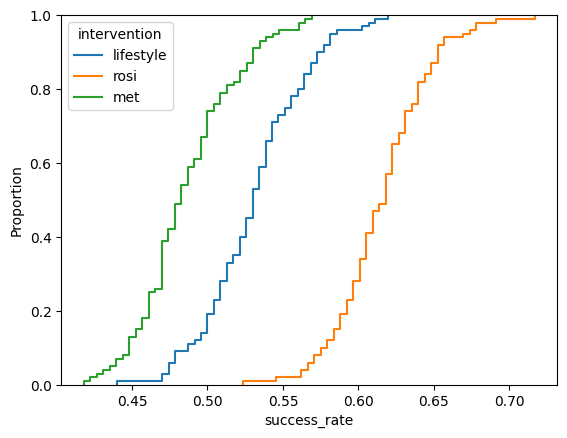

In [15]:
df['success'] = 0
df.loc[ df['outcome'] == 'success', 'success'] = 1

df_life = df.loc[df['treatment'] == 'lifestyle', :]
df_met = df.loc[df['treatment'] == 'met', :]
df_rosi = df.loc[df['treatment'] == 'rosi', :]

N_life = df_life.shape[0]
N_met = df_met.shape[0]
N_rosi = df_rosi.shape[0]

S = 100
fx_life = np.zeros(S)
fx_met = np.zeros(S)
fx_rosi = np.zeros(S)

for s in range(S):
  df_life_t = df_life.sample(N_life, axis=0, replace=True)
  df_rosi_t = df_rosi.sample(N_rosi, axis=0, replace=True)
  df_met_t = df_met.sample(N_met, axis=0, replace=True)

  fx_life_t = np.mean(df_life_t['success'])
  fx_rosi_t = np.mean(df_rosi_t['success'])
  fx_met_t = np.mean(df_met_t['success'])

  fx_life[s] = fx_life_t
  fx_rosi[s] = fx_rosi_t
  fx_met[s] = fx_met_t

gdf_life = pd.DataFrame({'intervention':'lifestyle', 'success_rate':fx_life})
gdf_rosi = pd.DataFrame({'intervention':'rosi', 'success_rate':fx_rosi})
gdf_met = pd.DataFrame({'intervention':'met', 'success_rate':fx_met})
rdf = pd.concat([gdf_life, gdf_rosi, gdf_met],axis=0)

sns.kdeplot(data=rdf, x='success_rate', hue='intervention')
plt.show()

sns.ecdfplot(data=rdf, x='success_rate', hue='intervention')
plt.show()

Rosi appears to be the most effective as its density peak is at a higher success rate, and the range of its success rates for the proportion has higher values.

###4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?

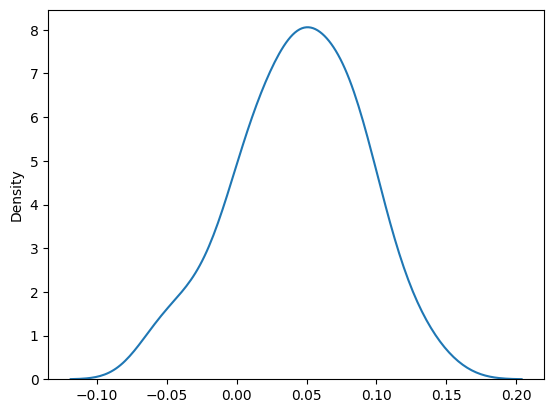

90% confidence interval, lifestyle vs met: [-0.03498195  0.11181108]


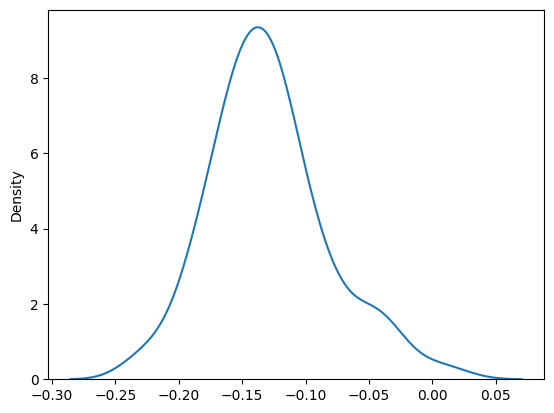

90% confidence interval, met vs rosi: [-0.19557681 -0.04045712]


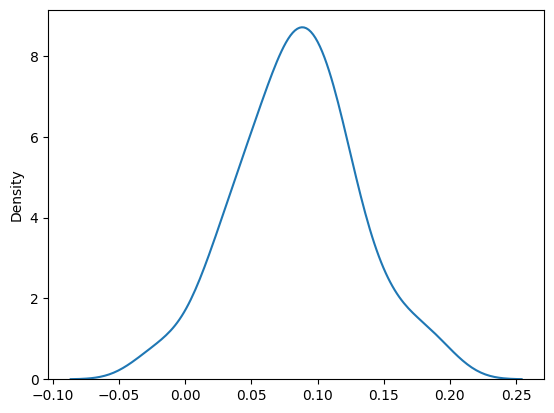

90% confidence interval, rosi vs lifestyle: [0.01516177 0.16541488]


In [16]:
# lifestyle vs. met
life_vs_met = np.array(fx_life-fx_met)
lvm_CI = np.quantile(life_vs_met, [0.05, 0.95])
sns.kdeplot(life_vs_met)
plt.show()
print("90% confidence interval, lifestyle vs met: " + str(lvm_CI))

# met vs. rosi
met_vs_rosi = np.array(fx_met-fx_rosi)
mvr_CI = np.quantile(met_vs_rosi, [0.05, 0.95])
sns.kdeplot(met_vs_rosi)
plt.show()
print("90% confidence interval, met vs rosi: " + str(mvr_CI))

# rosi vs. lifestyle
rosi_vs_life = np.array(fx_rosi-fx_life)
rvl_CI = np.quantile(rosi_vs_life, [0.05, 0.95])
sns.kdeplot(rosi_vs_life)
plt.show()
print("90% confidence interval, rosi vs lifestyle: " + str(rvl_CI))

Met and rosi are significantly different since 0 does not appear in its condfidence interval. The same goes for rosi and lifestyle. Since 0 does appear in the confidence interval for lifestyle and met, there isn't statistically significant difference between the two methods.

###5. Which treatment appears to be the most effective overall?

When we lot at the bootstrapped analysis, it looks like Rosi is more effective than both lifestyle and Met. It has higher success rates than the other two interventions and there is a statistically significant different in each pair it appears in. However, when determining which treatment is most effective in reality, we need to look at more information than just this data analysis. Other data, such as medical history, age, and the side effects of the drug need to be taken in to account so that patients know exactly how the treatment will affect them. Drugs can do damage to other parts of your body, while changing your lifestyle is organic and sustainable. Thus, it is important for a patient to weigh their options and be presented with a full analysis of all the factors that can come into play.